# Hough Lines

### Import resources and display the image

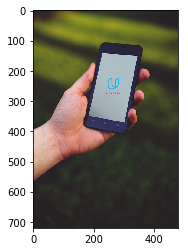

In [38]:
import numpy as np
import matplotlib.pyplot as plt
import cv2

%matplotlib inline

# Read in the image
image = cv2.imread('images/phone.jpg')

# Change color to RGB (from BGR)
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

plt.imshow(image)

### Perform edge detection

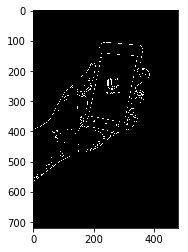

In [39]:
# Convert image to grayscale
gray = cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)

# Define our parameters for Canny
low_threshold = 50
high_threshold = 100
edges = cv2.Canny(gray, low_threshold, high_threshold)

plt.imshow(edges, cmap='gray')

### Find lines using a Hough transform

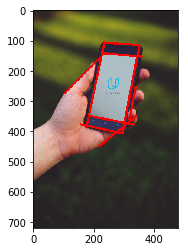

In [40]:
# Define the Hough transform parameters
# Make a blank the same size as our image to draw on
rho = 1
theta = np.pi/180
threshold = 60
min_line_length = 100
max_line_gap = 40

line_image = np.copy(image) #creating an image copy to draw lines on

# Run Hough on the edge-detected image
lines = cv2.HoughLinesP(edges, rho, theta, threshold, np.array([]),
                        min_line_length, max_line_gap)


# Iterate over the output "lines" and draw lines on the image copy
for line in lines:
    for x1,y1,x2,y2 in line:
        cv2.line(line_image,(x1,y1),(x2,y2),(255,0,0),5)
        
plt.imshow(line_image)

### Live feed

In [1]:
import cv2
import requests
import numpy as np
import matplotlib.pyplot as plt

In [4]:
def drawlines(image, lines):
    try:
        for line in lines:
            for a,b,c,d in line:
                cv2.line(image, (a,b,c,d), [255,0,0], 4)
    except:
        pass

In [5]:
def canny(image):
    
    copy = np.copy(image)
    gray = cv2.cvtColor(copy, cv2.COLOR_RGB2GRAY)
    
    low = 60
    high=100
    edges = cv2.Canny(image, low, high)
    return edges

In [1]:
def cannyandhough(image):
    
    gray = cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)

    # Define our parameters for Canny
    low_threshold = 50
    high_threshold = 100
    edges = cv2.Canny(gray, low_threshold, high_threshold)
    
    #hough transform
    rho = 1
    theta = np.pi/180
    threshold = 60
    min_line_length = 50
    max_line_gap = 40
    
    lines = cv2.HoughLinesP(edges, rho, theta, threshold, np.array([]),
                            min_line_length, max_line_gap)
    gray_image = drawlines(gray, lines)
    return (gray_image)

In [ ]:
url = "http://192.168.0.2:8080/shot.jpg"

while True:
    img_resp = requests.get(url)
    img_arr = np.array(bytearray(img_resp.content), dtype=np.uint8)
    img = cv2.imdecode(img_arr, -1)    
    rimg = cv2.resize(img, (480,320))
    cv2.imshow('sfd',rimg)
    cv2.waitKey(0)
    cv2.destroyAllWindows()
    
    #for canny
#     content = img_resp.content
#     canny_rimg = cv2.resize(img_resp.content, (480,320))
    
#     op = cannyandhough(rimg)
#     canny = canny(canny_rimg)
    
#     cv2.imshow('onl canny', canny)
#     cv2.imshow('cam', op)
    
#     if cv2.waitKey(1) == 27:
#         cv2.destroyAllWindows()
#         break
        

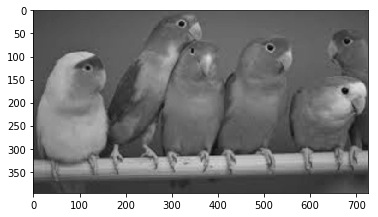

In [12]:
img = cv2.imread('images/birds.jpg', -1)
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
# plt.imshow
plt.imshow( gray, cmap='gray')

In [5]:
import cv2
import requests
import numpy as np
import matplotlib.pyplot as plt

In [6]:
def draw_lines(img, lines):
    try:
        for line in lines:
            coords = line[0]
            cv2.line(img, (coords[0],coords[1]), (coords[2],coords[3]), [0,255,0], 3)
    except:
        pass

In [7]:
def process_img(original_image):
    processed_img = cv2.cvtColor(original_image, cv2.COLOR_BGR2GRAY)
    ret,mask = cv2.threshold(processed_img, 100,250, cv2.THRESH_BINARY)
    processed_img = cv2.Canny(processed_img, threshold1=60, threshold2=100)
    processed_img = cv2.GaussianBlur(processed_img, (3,3), 0 )
#     vertices = np.array([[10,500],[10,300], [300,200], [500,200], [800,300], [800,500]], np.int32)
#     processed_img = roi(processed_img, [vertices])

    #                       edges
    lines = cv2.HoughLinesP(processed_img, 1, np.pi/180, 180, 20, 15)
    draw_lines(processed_img,lines)
    
    final_img = cv2.bitwise_and(original_image, original_image, mask)
    return final_img

In [8]:
url = "http://192.168.0.2:8080/shot.jpg"

while True:
    img_resp = requests.get(url)
    img_arr = np.array(bytearray(img_resp.content), dtype=np.uint8)
    img = cv2.imdecode(img_arr, -1)    
    rimg = cv2.resize(img, (480,320))
    
    op = process_img(rimg)
        
#     cv2.imshow('onl canny', canny)
    cv2.imshow('cam', op)
    
    if cv2.waitKey(1) == 27:
        cv2.destroyAllWindows()
        break